**Finding weights ( w & b ) using deep learning**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/EnggQasim/UIT/master/Deep_Learning/Chapter1/data/weight-height.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
#cost or loss function
def mean_squared_error(y_true,y_pred):
  s = (y_true - y_pred)**2
  return np.sqrt(s.mean())

#line function
def line(X,w=0,b=0):
  return X * w + b

In [24]:
X = df.Height.values
y_true = df.Weight.values

In [25]:
print(X[:5],y_true[:5], sep='\n\n')

[73.84701702 68.78190405 74.11010539 71.7309784  69.88179586]

[241.89356318 162.31047252 212.74085556 220.0424703  206.34980062]


In [16]:
X.shape

(10000,)

In [26]:
#model structure
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [27]:
#summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
#compilation steps
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [31]:
#model training
model.fit(X,y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 888us/step - loss: 849.8423
Epoch 2/40
313/313 [==============================] - 0s 952us/step - loss: 541.3948
Epoch 3/40
313/313 [==============================] - 0s 920us/step - loss: 525.2375
Epoch 4/40
313/313 [==============================] - 0s 907us/step - loss: 483.2820
Epoch 5/40
313/313 [==============================] - 0s 863us/step - loss: 426.8203
Epoch 6/40
313/313 [==============================] - 0s 879us/step - loss: 385.8722
Epoch 7/40
313/313 [==============================] - 0s 866us/step - loss: 358.4214
Epoch 8/40
313/313 [==============================] - 0s 885us/step - loss: 305.4210
Epoch 9/40
313/313 [==============================] - 0s 873us/step - loss: 283.4156
Epoch 10/40
313/313 [==============================] - 0s 882us/step - loss: 267.8261
Epoch 11/40
313/313 [==============================] - 0s 894us/step - loss: 251.2231
Epoch 12/40
313/313 [==============================] - 0s 849us

In [32]:
y_pred = model.predict(X)
y_pred

array([[219.18231],
       [180.25922],
       [221.2041 ],
       ...,
       [142.49802],
       [182.1983 ],
       [127.71484]], dtype=float32)

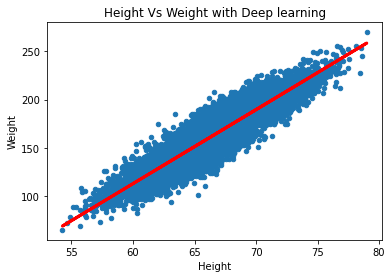

In [33]:
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight with Deep learning")
plt.plot(X, y_pred, color="red", linewidth=3)

In [34]:
w, b = model.get_weights()
print(w,b)


[[7.6845527]] [-348.29895]


Enter Height in Number66


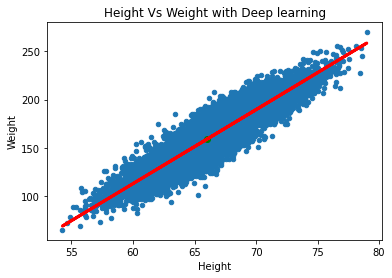

In [38]:
i = int(input("Enter Height in Number"))
j = model.predict([[i]])

df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight with Deep learning")
plt.plot(X, y_pred, color="red", linewidth=3)
plt.scatter(i,j, color='green')

In [39]:
model.save("./weight_height_model.h5")
